# Phân Đoạn Ngữ Nghĩa (Semantic Segmentation) với U-Net

## Giới Thiệu

### Phân Đoạn Ngữ Nghĩa là gì?
Phân đoạn ngữ nghĩa là một nhiệm vụ thị giác máy tính gán nhãn lớp cho từng pixel trong ảnh, chia ảnh thành các vùng tương ứng với các đối tượng hoặc danh mục khác nhau.

Ví dụ:

* Trong ảnh cảnh đường phố, phân đoạn ngữ nghĩa sẽ gán nhãn cho các pixel như đường, xe hơi, người đi bộ, tòa nhà, bầu trời, v.v.

* Kết quả là bản đồ dự đoán dày đặc trong đó mỗi pixel thuộc về một lớp, nhưng không thuộc về một instance đối tượng cụ thể (khác với phân đoạn instance, phân biệt giữa các đối tượng khác nhau cùng lớp).

Tóm lại: phân đoạn ngữ nghĩa giúp máy móc **"hiểu"** nội dung của ảnh ở mức pixel.

Mục tiêu của nhiệm vụ này là thực hiện phân đoạn ngữ nghĩa trên bộ dữ liệu [Pascal VOC 2012](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/) sử dụng kiến trúc [U-Net](https://arxiv.org/abs/1505.04597). Bộ dữ liệu bao gồm các ảnh tự nhiên với chú thích mức pixel cho 20 lớp đối tượng cộng với nền. Tuy nhiên, trong nhiệm vụ này, chúng ta chỉ chọn và sử dụng 5 lớp phụ (đối tượng) từ chúng.

U-Net là kiến trúc mạng tích chập được thiết kế ban đầu cho phân đoạn ảnh y sinh học và đã chứng minh hiệu quả cao cho các nhiệm vụ phân đoạn tổng quát. Chúng ta sẽ sử dụng kiến trúc U-Net để thực hiện phân đoạn ngữ nghĩa trên bộ dữ liệu Pascal VOC 2012. Đồng thời, mô hình ResNet34 đã được huấn luyện trước được sử dụng làm encoder của U-Net.

Một pipeline phân đoạn học sâu điển hình bao gồm:

1. Chuẩn bị và tiền xử lý dữ liệu
2. Định nghĩa mạng nơ-ron
3. Định nghĩa hàm mất mát
4. Huấn luyện
5. Đánh giá sử dụng các metric phù hợp

Nhiệm vụ của bạn là hoàn thành code còn thiếu, bao gồm từng bước của pipeline.

Để chuẩn bị tốt hơn cho bài kiểm tra này, bạn nên đọc bài báo U-Net [1] minh họa kiến trúc với các đường co hẹp và mở rộng đặc trưng.

[1] Ronneberger, O., Fischer, P., & Brox, T. (2015). "U-Net: Convolutional Networks for Biomedical Image Segmentation." In Medical Image Computing and Computer-Assisted Intervention (MICCAI).

### Metric Đánh Giá
mIoU (mean Intersection over Union) là metric đánh giá chuẩn cho các nhiệm vụ phân đoạn ngữ nghĩa. Nó đo lường độ trùng lặp trung bình giữa phân đoạn dự đoán và ground truth trên tất cả các lớp.

Đối với mỗi lớp $c$, **Intersection over Union (IoU)** được định nghĩa là:

$$
\text{IoU}_c = \frac{\text{True Positive}_c}{\text{True Positive}_c + \text{False Positive}_c + \text{False Negative}_c}
$$

Trong đó:
- **True Positive (TP)**: các pixel được dự đoán đúng là lớp $c$.
- **False Positive (FP)**: các pixel được dự đoán sai là lớp $c$.
- **False Negative (FN)**: các pixel của lớp $c$ được dự đoán là thứ khác.

Công thức này đo lường mức độ khớp của vùng dự đoán với vùng thực tế.

Sau khi tính IoU cho mỗi lớp, **mean IoU (mIoU)** là **trung bình trên tất cả $C$ lớp**:

$$
\text{mIoU} = \frac{1}{C} \sum_{c=1}^{C} \text{IoU}_c
$$

## Nộp Bài
Vui lòng tham khảo ```example_submission.xlsx``` để báo cáo mô hình với các siêu tham số đạt hiệu suất tốt nhất (đo bằng mIoU), cũng như danh sách đầy đủ các mô hình bạn đã triển khai. File ```.ipynb``` của bạn cũng cần được nộp.

Danh sách kiểm tra
* ```submission_YourName.xlsx```
* ```your_model_weights.pth```
* ```IOAI2025 Computer Vision Test.ipynb```

> Tổng điểm của bài kiểm tra này là **100**.

---

## Trước Khi Bắt Đầu
Trước khi bài kiểm tra bắt đầu, chúng tôi cung cấp một ví dụ toàn diện có thể chạy được để giúp bạn làm quen với các kỹ thuật học sâu chuẩn cho các nhiệm vụ phân đoạn ngữ nghĩa.

### Cài đặt các gói cần thiết

In [1]:
!pip3 install torch torchvision matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.8 MB/s eta 0:00:00


### Import các gói cần thiết

In [2]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

### Tải và chuẩn bị bộ dữ liệu
Chúng ta sẽ sử dụng phiên bản đơn giản hóa của bộ dữ liệu Pascal VOC cho ví dụ này.

In [ ]:
# Tải bộ dữ liệu Pascal VOC
# Mất khoảng 3 phút để hoàn thành...
folder_exists = os.path.isdir('./data')
voc_train_original = torchvision.datasets.VOCSegmentation(root='./data', year='2012', image_set='train', download=not folder_exists, transform=None, target_transform=None)
voc_val_original = torchvision.datasets.VOCSegmentation(root='./data', year='2012', image_set='val', download=not folder_exists, transform=None, target_transform=None)

100%|██████████| 2.00G/2.00G [01:04<00:00, 31.1MB/s]


In [5]:
voc_train_original[0][0]

In [ ]:
# Định nghĩa 5 lớp được chọn từ VOC
SELECTED_CLASSES = [
    "Person",  # Người
    "Car",     # Xe hơi
    "Dog",     # Chó
    "Bicycle", # Xe đạp
    "Chair"    # Ghế
]
SELECTED_VOC_CLASSES = [
    15,  # person (người)
    7,   # car (xe hơi)
    12,  # dog (chó)
    2,   # bicycle (xe đạp)
    9,   # chair (ghế)
]

# Định nghĩa colormap cho 5 lớp được chọn
SELECTED_VOC_COLORMAP = [
    [0, 0, 0],        # background (nền) (lớp 0)
    [192, 128, 128],  # person (người) (lớp 1)
    [128, 128, 128],  # car (xe hơi) (lớp 2)
    [64, 0, 128],     # dog (chó) (lớp 3)
    [0, 128, 0],      # bicycle (xe đạp) (lớp 4)
    [192, 0, 0],      # chair (ghế) (lớp 5)
]

# Ánh xạ lớp: chỉ số lớp VOC gốc -> chỉ số 6 lớp mới (nền + 5 lớp được chọn)
VOC_TO_SELECTED_CLASS_MAPPING = {
    0: 0,   # background -> background (nền -> nền)
    15: 1,  # person -> class 1 (người -> lớp 1)
    7: 2,   # car -> class 2 (xe hơi -> lớp 2)
    12: 3,  # dog -> class 3 (chó -> lớp 3)
    2: 4,   # bicycle -> class 4 (xe đạp -> lớp 4)
    9: 5,   # chair -> class 5 (ghế -> lớp 5)
}

In [ ]:
# Định nghĩa các phép biến đổi
class VOCTransform:
    def __init__(self, target_size=(256, 256)):
        self.target_size = target_size
        self.image_transform = transforms.Compose([
            transforms.Resize(target_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        self.target_transform = transforms.Compose([
            transforms.Resize(target_size, interpolation=transforms.InterpolationMode.NEAREST),
            transforms.PILToTensor()
        ])

    def __call__(self, image, target):
        image = self.image_transform(image)
        target = self.target_transform(target).squeeze().long()

        # Ánh xạ các lớp VOC sang các lớp được chọn
        target_ = torch.zeros_like(target)
        for voc_class, selected_class in VOC_TO_SELECTED_CLASS_MAPPING.items():
            target_[target == voc_class] = selected_class

        return image, target_

In [ ]:
# Tạo datasets và dataloaders
transform = VOCTransform(target_size=(256, 256))

In [ ]:
# Tạo class dataset được lọc chỉ bao gồm các ảnh với các lớp được chọn
class VOCSegmentationDataset(Dataset):
    # đây là phiên bản cải tiến của class VOCSegmentationDataset
    # nó chỉ bao gồm các ảnh với các lớp được chọn của chúng ta
    def __init__(self, voc_dataset, selected_classes, transform=None):
        self.voc_dataset = voc_dataset
        self.selected_classes = selected_classes
        self.transform = transform
        self.valid_indices = self._filter_dataset()

    def _filter_dataset(self):
        valid_indices = []
        print("Lọc dataset để chỉ bao gồm ảnh với các lớp được chọn...")
        for idx in tqdm(range(len(self.voc_dataset))):
            _, target = self.voc_dataset[idx]
            target_array = np.array(target)

            # Kiểm tra xem có lớp nào được chọn trong ảnh này không
            contains_selected_class = False
            for class_id in self.selected_classes:
                if np.any(target_array == class_id):
                    contains_selected_class = True
                    break

            if contains_selected_class:
                valid_indices.append(idx)

        print(f"Dataset đã lọc: {len(valid_indices)} trên {len(self.voc_dataset)} ảnh chứa các lớp được chọn")
        return valid_indices

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        original_idx = self.valid_indices[idx]
        image, target = self.voc_dataset[original_idx]

        if self.transform:
            image, target = self.transform(image, target)

        return image, target

In [ ]:
# Tạo các datasets đã lọc
train_dataset = VOCSegmentationDataset(
    voc_train_original,
    selected_classes=SELECTED_VOC_CLASSES,  # Sử dụng 5 lớp được chọn
    transform=transform
)

val_dataset = VOCSegmentationDataset(
    voc_val_original,
    selected_classes=SELECTED_VOC_CLASSES,
    transform=transform
)

Filtering dataset to include only images with selected classes...


100%|██████████| 1464/1464 [00:04<00:00, 340.22it/s]


Filtered dataset: 726 out of 1464 images contain selected classes
Filtering dataset to include only images with selected classes...


100%|██████████| 1449/1449 [00:04<00:00, 361.65it/s]

Filtered dataset: 719 out of 1449 images contain selected classes


In [ ]:
# Tạo dataloaders cho các datasets đã lọc
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [ ]:
# In kích thước datasets
print(f"Kích thước dataset huấn luyện gốc: {len(voc_train_original)}")
print(f"Kích thước dataset huấn luyện đã lọc: {len(train_dataset)}")
print(f"Kích thước dataset validation gốc: {len(voc_val_original)}")
print(f"Kích thước dataset validation đã lọc: {len(val_dataset)}")

Original training dataset size: 1464
Filtered training dataset size: 726
Original validation dataset size: 1449
Filtered validation dataset size: 719


Hãy cùng trực quan hóa một số ví dụ từ bộ dữ liệu.

In [ ]:
# Hàm chuyển đổi mask phân đoạn thành ảnh RGB
def decode_segmap(mask):
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)

    for l in range(0, len(SELECTED_VOC_COLORMAP)):
        idx = mask == l
        r[idx] = SELECTED_VOC_COLORMAP[l][0]
        g[idx] = SELECTED_VOC_COLORMAP[l][1]
        b[idx] = SELECTED_VOC_COLORMAP[l][2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

In [ ]:
# Hàm hiển thị ảnh và mask phân đoạn
def show_sample(image, mask):
    # Denormalize ảnh
    image = image.cpu().numpy().transpose(1, 2, 0)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)

    # Chuyển đổi mask thành RGB
    mask = mask.cpu().numpy()
    mask_rgb = decode_segmap(mask)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.imshow(image)
    ax1.set_title('Ảnh')
    ax1.axis('off')

    ax2.imshow(mask_rgb)
    ax2.set_title('Mask Phân Đoạn')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

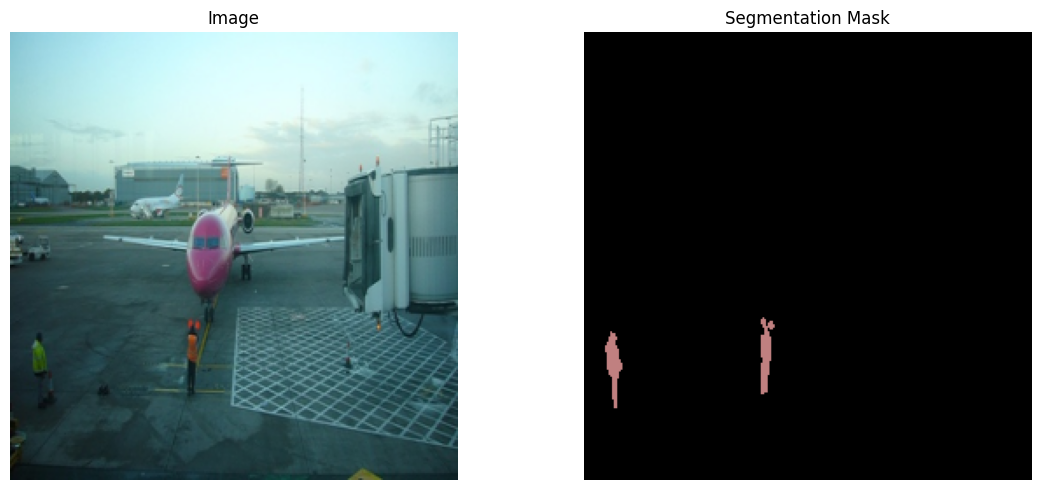

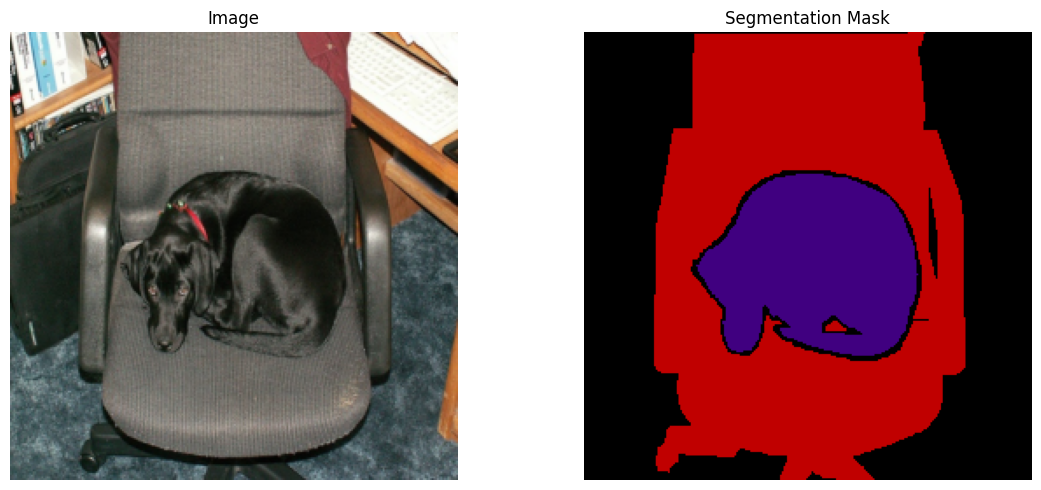

In [ ]:
# Hiển thị một số mẫu
for i in range(3):
    image, mask = train_dataset[i]
    show_sample(image, mask)

### Định nghĩa mô hình phân đoạn đơn giản
Đầu tiên, hãy định nghĩa một mạng tích chập đơn giản cho phân đoạn.

In [16]:
class SimpleSegmentationModel(nn.Module):
    def __init__(self, num_classes=6):
        super(SimpleSegmentationModel, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, num_classes, kernel_size=3, padding=1),
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [17]:
model = SimpleSegmentationModel().to(device)

In [ ]:
# Để lưu mô hình
torch.save(model.state_dict(), './model.pth')
# Để tải mô hình
model.load_state_dict(torch.load('./model.pth'))

<All keys matched successfully>

### Định nghĩa hàm mất mát

In [ ]:
# Định nghĩa hàm mất mát
criterion = nn.CrossEntropyLoss(ignore_index=255)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

### Vòng lặp huấn luyện

In [ ]:
def calculate_iou(pred, target, num_classes=6):
    ious = []
    pred = pred.view(-1)
    target = target.view(-1)

    # Tạo mask để bỏ qua các pixel có nhãn 255
    valid_pixels = target != 255
    pred = pred[valid_pixels]
    target = target[valid_pixels]

    # Bỏ qua IoU cho lớp nền
    for cls in range(1, num_classes):  # Loại trừ nền
        pred_inds = pred == cls
        target_inds = target == cls

        intersection = (pred_inds & target_inds).sum().float()
        union = (pred_inds | target_inds).sum().float()

        if union == 0:
            ious.append(float('nan'))  # Nếu không có ground truth, không bao gồm trong đánh giá
        else:
            ious.append(intersection / union)

    return torch.tensor(ious).nanmean()

In [ ]:
# Hàm huấn luyện
def train_model(model, train_loader, criterion, optimizer, num_epochs=2):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(tqdm(train_loader)):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Đặt gradient về 0
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            loss = criterion(outputs, labels)

            # Backward pass và tối ưu hóa
            loss.backward()
            optimizer.step()

            # In thống kê
            running_loss += loss.item()
            if i % 50 == 49:
                print(f"Epoch: {epoch+1}, Batch: {i+1}, Loss: {running_loss/50:.4f}")
                running_loss = 0.0

In [ ]:
# Hàm validation
def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    val_iou = 0.0
    num_batches = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Tính IoU
            preds = torch.argmax(outputs, dim=1)
            iou = calculate_iou(preds, labels)

            val_loss += loss.item()
            val_iou += iou.item()
            num_batches += 1

    avg_loss = val_loss / num_batches
    avg_iou = val_iou / num_batches

    print(f"Validation - Loss: {avg_loss:.4f}, Mean IoU: {avg_iou:.4f}")
    model.train()
    return avg_loss, avg_iou

In [ ]:
# Huấn luyện mô hình
train_model(model, train_loader, criterion, optimizer, num_epochs=5)

 57%|█████▋    | 52/91 [00:06<00:03, 10.25it/s]

Epoch: 1, Batch: 50, Loss: 0.8853


 57%|█████▋    | 52/91 [00:05<00:03,  9.99it/s]

Epoch: 2, Batch: 50, Loss: 0.7145


 55%|█████▍    | 50/91 [00:04<00:03, 10.51it/s]

Epoch: 3, Batch: 50, Loss: 0.6945


 57%|█████▋    | 52/91 [00:05<00:03, 10.41it/s]

Epoch: 4, Batch: 50, Loss: 0.6448


 56%|█████▌    | 51/91 [00:05<00:03, 10.36it/s]

Epoch: 5, Batch: 50, Loss: 0.6890


100%|██████████| 91/91 [00:09<00:00,  9.98it/s]


In [24]:
validate_model(model, val_loader, criterion)

100%|██████████| 90/90 [00:07<00:00, 11.60it/s]

Validation - Loss: 0.7039, Mean IoU: 0.0000


(0.7038919630977842, 0.0)

### Trực quan hóa kết quả

In [ ]:
# Hàm trực quan hóa dự đoán
def visualize_predictions(model, dataset, num_samples=3):
    model.eval()
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5*num_samples))

    for i in range(num_samples):
        # Lấy một mẫu
        image, mask = dataset[i]

        # Thực hiện dự đoán
        with torch.no_grad():
            input_tensor = image.unsqueeze(0).to(device)
            output = model(input_tensor)
            pred = torch.argmax(output, dim=1).squeeze().cpu().numpy()

        # Denormalize ảnh
        image = image.cpu().numpy().transpose(1, 2, 0)
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

        # Chuyển đổi masks thành RGB
        mask = mask.cpu().numpy()
        mask_rgb = decode_segmap(mask)
        pred_rgb = decode_segmap(pred)

        # Hiển thị
        axes[i, 0].imshow(image)
        axes[i, 0].set_title('Ảnh')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(mask_rgb)
        axes[i, 1].set_title('Ground Truth')
        axes[i, 1].axis('off')

        axes[i, 2].imshow(pred_rgb)
        axes[i, 2].set_title('Dự Đoán')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

# Trực quan hóa một số dự đoán
visualize_predictions(model, val_dataset, num_samples=3)

## Q1 Triển Khai U-Net cho Phân Đoạn Ngữ Nghĩa
Mô hình đơn giản ở trên đạt hiệu suất hạn chế. Trong phần này, chúng ta sẽ cải thiện hiệu suất bằng cách triển khai kiến trúc U-Net, được thiết kế đặc biệt cho các nhiệm vụ phân đoạn. Bạn cần điền vào các phần còn thiếu trong ba phần sau trong Q1:
1. Data augmentation
2. Triển khai kiến trúc U-Net
3. Hàm mất mát

### Q1.1 Triển khai data augmentation (5 điểm)
Data augmentation rất quan trọng để cải thiện khả năng tổng quát hóa của mô hình. Bạn cần điền **2 dòng** sử dụng các hàm có sẵn của PyTorch:
1. Random horizontal flip với xác suất 0.5
2. Random rotation giữa -10 và 10 độ

In [ ]:
class VOCAugmentedTransform:
    def __init__(self, target_size=(256, 256)):
        self.target_size = target_size
        self.image_transform = transforms.Compose([
            transforms.Resize(target_size),
            ###YOUR CODE HERE###
            # Q1.1 line 1
            
            # Q1.1 line 2
            ###END OF YOUR CODE###
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        self.target_transform = transforms.Compose([
            transforms.Resize(target_size, interpolation=transforms.InterpolationMode.NEAREST),
            # Các augmentation giống nhau nên được áp dụng cho target
            ###YOUR CODE HERE###
            # Q1.1 line 1 (giống như trên)

            # Q1.1 line 2 (giống như trên)
            
            ###END OF YOUR CODE###
            transforms.PILToTensor()
        ])

    def __call__(self, image, target):
        # Áp dụng cùng random seed cho cả hai transforms
        seed = np.random.randint(2147483647)
        torch.manual_seed(seed)

        image = self.image_transform(image)
        target = self.target_transform(target).squeeze().long()

        target_ = torch.zeros_like(target)
        for voc_class, selected_class in VOC_TO_SELECTED_CLASS_MAPPING.items():
            target_[target == voc_class] = selected_class
        return image, target_

# Tạo datasets với augmented transformations
augmented_transform = VOCAugmentedTransform(target_size=(256, 256))
train_dataset_augmented = VOCSegmentationDataset(
    voc_train_original,
    selected_classes=SELECTED_VOC_CLASSES,
    transform=augmented_transform)

train_loader_augmented = DataLoader(train_dataset_augmented, batch_size=8, shuffle=True)

Filtering dataset to include only images with selected classes...


100%|██████████| 1464/1464 [00:04<00:00, 343.64it/s]

Filtered dataset: 726 out of 1464 images contain selected classes


### Q1.2 Triển khai kiến trúc U-Net (15 điểm)
Kiến trúc U-Net bao gồm một đường co hẹp (encoder) và một đường mở rộng (decoder) với các skip connections giữa chúng. Bạn cần điền **7 dòng** trong triển khai U-Net:
1. Triển khai block convolutional đầu tiên trong encoder
2. Triển khai skip connection nối các feature của encoder với decoder
3. Triển khai lớp convolutional cuối cùng ánh xạ tới số lượng lớp

In [ ]:
class DoubleConv(nn.Module):
    """(Conv -> BN -> ReLU) * 2"""
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class UNet(nn.Module):
    def __init__(self, n_channels=3, n_classes=6):
        super(UNet, self).__init__()
        # Encoder (downsampling path)
        # Q1.2 line 1: Implement the first convolutional block
        self.inc = DoubleConv(n_channels, 64)  ###YOUR CODE HERE###
        self.down1 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(64, 128))  ###YOUR CODE HERE###
        self.down2 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(128, 256))  ###YOUR CODE HERE###
        self.down3 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(256, 512))  ###YOUR CODE HERE###
        self.down4 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(512, 1024))  ###YOUR CODE HERE###

        # Decoder (upsampling path)
        self.up1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.conv1 = DoubleConv(1024, 512)  # 1024 because of concatenation

        self.up2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.conv2 = DoubleConv(512, 256)  # 512 because of concatenation

        self.up3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv3 = DoubleConv(256, 128)  # 256 because of concatenation

        self.up4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.conv4 = DoubleConv(128, 64)  # 128 because of concatenation

        # Q1.2 line 3: Final convolutional layer
        self.outc = nn.Conv2d(64, n_classes, kernel_size=1) ###YOUR CODE HERE###

    def forward(self, x):
        # Encoder path
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)

        # Decoder path with skip connections
        x = self.up1(x5)
        # Q1.2 line 2: Implement skip connection (concatenate x with x4)
        x = torch.cat([x, x4], dim=1)  ###YOUR CODE HERE###
        x = self.conv1(x)

        x = self.up2(x)
        x = torch.cat([x, x3], dim=1)
        x = self.conv2(x)

        x = self.up3(x)
        x = torch.cat([x, x2], dim=1)
        x = self.conv3(x)

        x = self.up4(x)
        x = torch.cat([x, x1], dim=1)
        x = self.conv4(x)

        x = self.outc(x)
        return x

In [28]:
# Initialize the U-Net model
unet = UNet(n_channels=3, n_classes=6).to(device)

### Q1.3 Triển khai hàm mất mát phù hợp (5 điểm)
Đối với phân đoạn ngữ nghĩa, chúng ta cần một hàm mất mát xử lý hiệu quả việc mất cân bằng lớp. Bạn cần điền **1 dòng** sử dụng hàm có sẵn của PyTorch:
1. Triển khai weighted cross-entropy loss cho các lớp ít thường xuyên hơn

In [ ]:
# Tính trọng số lớp dựa trên tần suất trong tập huấn luyện
def calculate_class_weights(dataloader, num_classes=6):
    class_counts = torch.zeros(num_classes)
    for _, target in tqdm(dataloader, desc="Tính trọng số lớp"):
        for c in range(num_classes):
            class_counts[c] += (target == c).sum().item()

    # Chuẩn hóa để có trọng số (các lớp ít thường xuyên hơn có trọng số cao hơn)
    class_weights = 1.0 / (class_counts + 1e-10)  # Thêm epsilon nhỏ để tránh chia cho 0
    class_weights = class_weights / class_weights.sum() * num_classes
    return class_weights

# Tính trọng số lớp
class_weights = calculate_class_weights(train_loader)
class_weights = class_weights.to(device)

# Q1.3 line 1: Định nghĩa weighted cross-entropy loss
criterion_unet = nn.CrossEntropyLoss(
    ###YOUR CODE HERE###
    weight=class_weights,
    ignore_index=255
)

# Định nghĩa optimizer
optimizer_unet = optim.AdamW(unet.parameters(), lr=1e-3, weight_decay=1e-4)

Calculating class weights: 100%|██████████| 91/91 [00:06<00:00, 14.75it/s]


In [30]:
train_model(unet, train_loader_augmented, criterion_unet, optimizer_unet, num_epochs=5)

 55%|█████▍    | 50/91 [00:25<00:20,  1.98it/s]

Epoch: 1, Batch: 50, Loss: 1.7904


 55%|█████▍    | 50/91 [00:26<00:21,  1.89it/s]

Epoch: 2, Batch: 50, Loss: 1.7227


 55%|█████▍    | 50/91 [00:25<00:21,  1.93it/s]

Epoch: 3, Batch: 50, Loss: 1.6965


 55%|█████▍    | 50/91 [00:26<00:21,  1.87it/s]

Epoch: 4, Batch: 50, Loss: 1.6977


 55%|█████▍    | 50/91 [00:27<00:22,  1.85it/s]

Epoch: 5, Batch: 50, Loss: 1.6281


100%|██████████| 91/91 [00:48<00:00,  1.89it/s]


In [31]:
validate_model(unet, val_loader, criterion_unet)

100%|██████████| 90/90 [00:19<00:00,  4.69it/s]

Validation - Loss: 1.5310, Mean IoU: 0.0626


(1.5310029877556695, 0.06260780150898629)

### Q1.4 Thêm backbone ResNet đã huấn luyện trước vào kiến trúc U-Net (10 điểm)
Tuy nhiên, huấn luyện U-Net từ đầu rất tốn thời gian. Trong câu hỏi này, bạn cần thêm backbone ResNet đã huấn luyện trước vào kiến trúc U-Net và fine-tune mô hình trên bộ dữ liệu Pascal VOC. Bạn cần điền **1 dòng** sử dụng các hàm có sẵn của PyTorch.

<!-- ![alt text](resnet34.png "ResNet34") -->

In [ ]:
# Import các mô hình đã huấn luyện trước
from torchvision.models import resnet34, ResNet34_Weights

In [ ]:
# Định nghĩa U-Net với backbone ResNet đã huấn luyện trước
class UNetWithResNetBackbone(nn.Module):
    def __init__(self, n_classes=6):
        super(UNetWithResNetBackbone, self).__init__()

        # Tải ResNet34 đã huấn luyện trước làm encoder
        resnet = resnet34(weights=ResNet34_Weights.DEFAULT)

        # Các lớp encoder
        # Chúng ta sử dụng lớp conv đầu tiên của ResNet làm lớp đầu tiên của encoder
        # Dòng này yêu cầu bạn tạo một module sequential chứa lớp convolutional đầu tiên (7x7 với stride 2),
        # theo sau là batch normalization và ReLU activation từ mô hình ResNet34 đã huấn luyện trước. Bạn cần sử dụng các lớp từ mô hình resnet.
        self.encoder1 = nn.Sequential(
            resnet.conv1,
            resnet.bn1,
            resnet.relu
        )  ###YOUR CODE HERE###  # 64 channels
        self.pool1 = resnet.maxpool
        self.encoder2 = resnet.layer1  # 64 channels
        self.encoder3 = resnet.layer2  # 128 channels
        self.encoder4 = resnet.layer3  # 256 channels
        self.encoder5 = resnet.layer4  # 512 channels

        # Các lớp decoder
        self.upconv5 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder5 = DoubleConv(512, 256)

        self.upconv4 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder4 = DoubleConv(256, 128)

        self.upconv3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder3 = DoubleConv(128, 64)

        self.upconv2 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.decoder2 = DoubleConv(96, 32)  # 96 = 64 + 32

        self.upconv1 = nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2)
        self.decoder1 = DoubleConv(16, 16)

        self.conv_last = nn.Conv2d(16, n_classes, kernel_size=1)

    def forward(self, x):
        # Encoder
        e1 = self.encoder1(x)  # 64 channels, 1/2 resolution
        e2 = self.encoder2(self.pool1(e1))  # 64 channels, 1/4 resolution
        e3 = self.encoder3(e2)  # 128 channels, 1/8 resolution
        e4 = self.encoder4(e3)  # 256 channels, 1/16 resolution
        e5 = self.encoder5(e4)  # 512 channels, 1/32 resolution

        # Decoder với skip connections
        d5 = self.upconv5(e5)  # 256 channels, 1/16 resolution
        d5 = torch.cat([d5, e4], dim=1)  # 512 channels (256 + 256)
        d5 = self.decoder5(d5)  # 256 channels

        d4 = self.upconv4(d5)  # 128 channels, 1/8 resolution
        d4 = torch.cat([d4, e3], dim=1)  # 256 channels (128 + 128)
        d4 = self.decoder4(d4)  # 128 channels

        d3 = self.upconv3(d4)  # 64 channels, 1/4 resolution
        d3 = torch.cat([d3, e2], dim=1)  # 128 channels (64 + 64)
        d3 = self.decoder3(d3)  # 64 channels

        d2 = self.upconv2(d3)  # 32 channels, 1/2 resolution
        d2 = torch.cat([d2, e1], dim=1)  # 96 channels (32 + 64)
        d2 = self.decoder2(d2)  # 32 channels

        d1 = self.upconv1(d2)  # 16 channels, original resolution
        d1 = self.decoder1(d1)  # 16 channels

        out = self.conv_last(d1)  # n_classes channels
        return out

In [ ]:
# Khởi tạo mô hình
unet_resnet = UNetWithResNetBackbone(n_classes=6).to(device)

# Định nghĩa optimizer với learning rates khác nhau cho các lớp đã huấn luyện trước và lớp mới
encoder_params = list(unet_resnet.encoder1.parameters()) + \
                list(unet_resnet.encoder2.parameters()) + \
                list(unet_resnet.encoder3.parameters()) + \
                list(unet_resnet.encoder4.parameters()) + \
                list(unet_resnet.encoder5.parameters())

decoder_params = list(unet_resnet.upconv5.parameters()) + \
                list(unet_resnet.decoder5.parameters()) + \
                list(unet_resnet.upconv4.parameters()) + \
                list(unet_resnet.decoder4.parameters()) + \
                list(unet_resnet.upconv3.parameters()) + \
                list(unet_resnet.decoder3.parameters()) + \
                list(unet_resnet.upconv2.parameters()) + \
                list(unet_resnet.decoder2.parameters()) + \
                list(unet_resnet.upconv1.parameters()) + \
                list(unet_resnet.decoder1.parameters()) + \
                list(unet_resnet.conv_last.parameters())

optimizer_transfer = optim.Adam([
    {'params': encoder_params, 'lr': 0.0001},  # Learning rate thấp hơn cho các lớp đã huấn luyện trước
    {'params': decoder_params, 'lr': 0.001}    # Learning rate cao hơn cho các lớp mới
])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 183MB/s]


In [35]:
train_model(unet_resnet, train_loader_augmented, criterion_unet, optimizer_transfer, num_epochs=5)

 56%|█████▌    | 51/91 [00:09<00:07,  5.67it/s]

Epoch: 1, Batch: 50, Loss: 1.6820


 56%|█████▌    | 51/91 [00:09<00:06,  5.77it/s]

Epoch: 2, Batch: 50, Loss: 1.4169


 55%|█████▍    | 50/91 [00:08<00:08,  5.11it/s]

Epoch: 3, Batch: 50, Loss: 1.2924


 56%|█████▌    | 51/91 [00:09<00:07,  5.69it/s]

Epoch: 4, Batch: 50, Loss: 1.2350


 56%|█████▌    | 51/91 [00:09<00:06,  5.86it/s]

Epoch: 5, Batch: 50, Loss: 1.1721


100%|██████████| 91/91 [00:16<00:00,  5.53it/s]


In [36]:
validate_model(unet_resnet, val_loader, criterion_unet)

100%|██████████| 90/90 [00:07<00:00, 11.53it/s]

Validation - Loss: 0.9654, Mean IoU: 0.1308


(0.9653861224651337, 0.13079489404335617)

### Q1.4 Phần Bonus (10 điểm)
Hiệu suất dự kiến là khoảng 35% mIoU nếu bạn sử dụng cùng cài đặt. Tuy nhiên, bạn có thể thử các cài đặt khác nhau để cải thiện mIoU. Tiêu chí chấm điểm dựa trên mIoU cuối cùng. mIoU cao hơn thì tốt hơn.

Lưu ý: hãy nhớ đánh giá và cân bằng giữa thời gian huấn luyện và hiệu suất.

In [37]:
for param in encoder_params:
    param.requires_grad_(False)
optimizer_transfer = optim.Adam(decoder_params, 0.001)

In [38]:
train_model(unet_resnet, train_loader_augmented, criterion_unet, optimizer_transfer, num_epochs=25)

 56%|█████▌    | 51/91 [00:07<00:05,  7.75it/s]

Epoch: 1, Batch: 50, Loss: 1.1632


 56%|█████▌    | 51/91 [00:06<00:05,  7.95it/s]

Epoch: 2, Batch: 50, Loss: 1.0350


 56%|█████▌    | 51/91 [00:06<00:05,  7.75it/s]

Epoch: 3, Batch: 50, Loss: 1.1055


 56%|█████▌    | 51/91 [00:07<00:05,  7.81it/s]

Epoch: 4, Batch: 50, Loss: 1.0454


 56%|█████▌    | 51/91 [00:06<00:05,  7.74it/s]

Epoch: 5, Batch: 50, Loss: 1.0520


 56%|█████▌    | 51/91 [00:06<00:05,  7.79it/s]

Epoch: 6, Batch: 50, Loss: 1.0118


 56%|█████▌    | 51/91 [00:06<00:05,  7.79it/s]

Epoch: 7, Batch: 50, Loss: 1.0139


 56%|█████▌    | 51/91 [00:06<00:05,  7.72it/s]

Epoch: 8, Batch: 50, Loss: 1.0108


 56%|█████▌    | 51/91 [00:07<00:05,  7.77it/s]

Epoch: 9, Batch: 50, Loss: 1.0287


 56%|█████▌    | 51/91 [00:07<00:05,  7.66it/s]

Epoch: 10, Batch: 50, Loss: 1.0545


 56%|█████▌    | 51/91 [00:07<00:05,  7.82it/s]

Epoch: 11, Batch: 50, Loss: 1.0492


 56%|█████▌    | 51/91 [00:07<00:05,  7.71it/s]

Epoch: 12, Batch: 50, Loss: 0.9740


 56%|█████▌    | 51/91 [00:06<00:05,  7.86it/s]

Epoch: 13, Batch: 50, Loss: 0.9384


 56%|█████▌    | 51/91 [00:06<00:05,  7.82it/s]

Epoch: 14, Batch: 50, Loss: 1.0019


 56%|█████▌    | 51/91 [00:06<00:05,  7.80it/s]

Epoch: 15, Batch: 50, Loss: 0.9286


 56%|█████▌    | 51/91 [00:06<00:05,  7.66it/s]

Epoch: 16, Batch: 50, Loss: 1.0575


 56%|█████▌    | 51/91 [00:06<00:05,  7.84it/s]

Epoch: 17, Batch: 50, Loss: 0.9888


 56%|█████▌    | 51/91 [00:06<00:05,  7.83it/s]

Epoch: 18, Batch: 50, Loss: 0.9012


 56%|█████▌    | 51/91 [00:07<00:05,  7.54it/s]

Epoch: 19, Batch: 50, Loss: 0.9644


 56%|█████▌    | 51/91 [00:06<00:05,  7.74it/s]

Epoch: 20, Batch: 50, Loss: 0.9885


 56%|█████▌    | 51/91 [00:06<00:05,  7.93it/s]

Epoch: 21, Batch: 50, Loss: 0.8616


 56%|█████▌    | 51/91 [00:07<00:05,  7.61it/s]

Epoch: 22, Batch: 50, Loss: 0.9401


 56%|█████▌    | 51/91 [00:06<00:05,  7.88it/s]

Epoch: 23, Batch: 50, Loss: 0.8985


 56%|█████▌    | 51/91 [00:06<00:05,  7.96it/s]

Epoch: 24, Batch: 50, Loss: 0.9629


 56%|█████▌    | 51/91 [00:06<00:05,  7.83it/s]

Epoch: 25, Batch: 50, Loss: 0.8635


100%|██████████| 91/91 [00:12<00:00,  7.55it/s]


In [39]:
validate_model(unet_resnet, val_loader, criterion_unet)

100%|██████████| 90/90 [00:08<00:00, 10.78it/s]

Validation - Loss: 0.7629, Mean IoU: 0.1862


(0.7629164977206124, 0.18623074715336163)

## Q2 Cải thiện thêm mô hình phân đoạn
Chúng ta đã đạt được hiệu suất tốt hơn sử dụng kiến trúc U-Net. Trong Q2, bạn cần cải thiện thêm hiệu suất của mô hình phân đoạn theo ba hướng có thể sau:
1. U-Net sâu hơn với residual connections
2. Các hàm mất mát thay thế

### Q2.1 U-Net sâu hơn với residual connections (5 điểm)
U-Net chuẩn có thể được cải thiện bằng cách thêm residual connections trong mỗi block, tương tự như ResNet. Triển khai U-Net sâu hơn với residual connections để cải thiện hiệu suất. Bạn cần điền **1 dòng** sử dụng các hàm có sẵn của PyTorch:
1. Triển khai skip connection

Tài liệu tham khảo:
1. https://arxiv.org/abs/1512.03385 (Bài báo ResNet)
2. https://arxiv.org/abs/1608.04117 (ResUNet)

In [ ]:
# Triển khai ResidualBlock cho U-Net
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Skip connection
        self.skip = nn.Sequential()
        if in_channels != out_channels:
            self.skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = x
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        # Q2.1 line 1: Triển khai skip connection
        ####YOUR CODE HERE###
        out = out + self.skip(residual)
        ###END OF YOUR CODE###
        out = self.relu(out)
        return out


# Triển khai ResUNet
class ResUNet(nn.Module):
    def __init__(self, n_channels=3, n_classes=6):
        super(ResUNet, self).__init__()

        # Encoder
        self.inc = ResidualBlock(n_channels, 64)
        self.down1 = nn.Sequential(nn.MaxPool2d(2), ResidualBlock(64, 128))
        self.down2 = nn.Sequential(nn.MaxPool2d(2), ResidualBlock(128, 256))
        self.down3 = nn.Sequential(nn.MaxPool2d(2), ResidualBlock(256, 512))
        self.down4 = nn.Sequential(nn.MaxPool2d(2), ResidualBlock(512, 1024))

        # Decoder
        self.up1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.conv1 = ResidualBlock(1024, 512)

        self.up2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.conv2 = ResidualBlock(512, 256)

        self.up3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv3 = ResidualBlock(256, 128)

        self.up4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.conv4 = ResidualBlock(128, 64)

        self.outc = nn.Conv2d(64, n_classes, kernel_size=1)

    def forward(self, x):
        # Encoder
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)

        # Decoder với skip connections
        x = self.up1(x5)
        x = torch.cat([x, x4], dim=1)
        x = self.conv1(x)

        x = self.up2(x)
        x = torch.cat([x, x3], dim=1)
        x = self.conv2(x)

        x = self.up3(x)
        x = torch.cat([x, x2], dim=1)
        x = self.conv3(x)

        x = self.up4(x)
        x = torch.cat([x, x1], dim=1)
        x = self.conv4(x)

        x = self.outc(x)
        return x

In [ ]:
# Khởi tạo mô hình ResUNet
resunet = ResUNet(n_channels=3, n_classes=6).to(device)

### Q2.2 Các hàm mất mát thay thế (5 điểm)
Triển khai các hàm mất mát thay thế phù hợp hơn cho các nhiệm vụ phân đoạn, như Focal loss. Bạn cần điền **vài dòng** sử dụng các hàm có sẵn của PyTorch:
1. Triển khai focal loss

Tài liệu tham khảo:
1. https://arxiv.org/abs/1708.02002 (Focal Loss)

In [ ]:
# Triển khai Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, weight=None, ignore_index=255):
        super(FocalLoss, self).__init__()
        self.alpha = alpha  # alpha là tham số cân bằng
        self.gamma = gamma  # gamma là tham số tập trung
        self.weight = weight  # weight là trọng số của mỗi lớp
        self.ignore_index = ignore_index  # ignore_index là chỉ số của lớp bị bỏ qua
        self.ce_fn = nn.CrossEntropyLoss(weight=weight, ignore_index=ignore_index, reduction='none')

    def forward(self, inputs, targets):
        # Q2.2 Triển khai focal loss
        ####YOUR CODE HERE###
        neg_log_pt = self.ce_fn(inputs, targets)
        pt = torch.exp(-neg_log_pt)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * neg_log_pt
        ###END OF YOUR CODE###
        return focal_loss.mean()

focal_loss = FocalLoss(weight=class_weights, gamma=2, ignore_index=255)

#### Câu hỏi (5 điểm)

Alpha và gamma làm gì trong focal loss?

#### Câu trả lời

- Alpha giải quyết vấn đề mất cân bằng lớp. Nó là các yếu tố cân bằng cho các lớp.
- Gamma lớn hơn giảm trọng số các ví dụ dễ (khi $p_t$ gần 1) và tập trung nhiều hơn vào các ví dụ bị phân loại sai hoặc không chắc chắn.

### Huấn luyện và đánh giá mô hình cải tiến

In [ ]:
# Huấn luyện ResUNet với augmentations nâng cao và combined loss
optimizer_resunet = optim.AdamW(resunet.parameters(), lr=1e-3, weight_decay=1e-4)
train_model(resunet, train_loader, criterion_unet, optimizer_resunet, num_epochs=5)

 55%|█████▍    | 50/91 [00:29<00:24,  1.68it/s]

Epoch: 1, Batch: 50, Loss: 1.7826


 55%|█████▍    | 50/91 [00:29<00:24,  1.70it/s]

Epoch: 2, Batch: 50, Loss: 1.7064


 55%|█████▍    | 50/91 [00:29<00:23,  1.71it/s]

Epoch: 3, Batch: 50, Loss: 1.6728


 55%|█████▍    | 50/91 [00:29<00:24,  1.70it/s]

Epoch: 4, Batch: 50, Loss: 1.5597


 55%|█████▍    | 50/91 [00:29<00:24,  1.70it/s]

Epoch: 5, Batch: 50, Loss: 1.5398


100%|██████████| 91/91 [00:53<00:00,  1.70it/s]


In [44]:
validate_model(resunet, val_loader, criterion_unet)

100%|██████████| 90/90 [00:21<00:00,  4.25it/s]

Validation - Loss: 1.4817, Mean IoU: 0.0680


(1.4816662232081095, 0.06801733136590984)

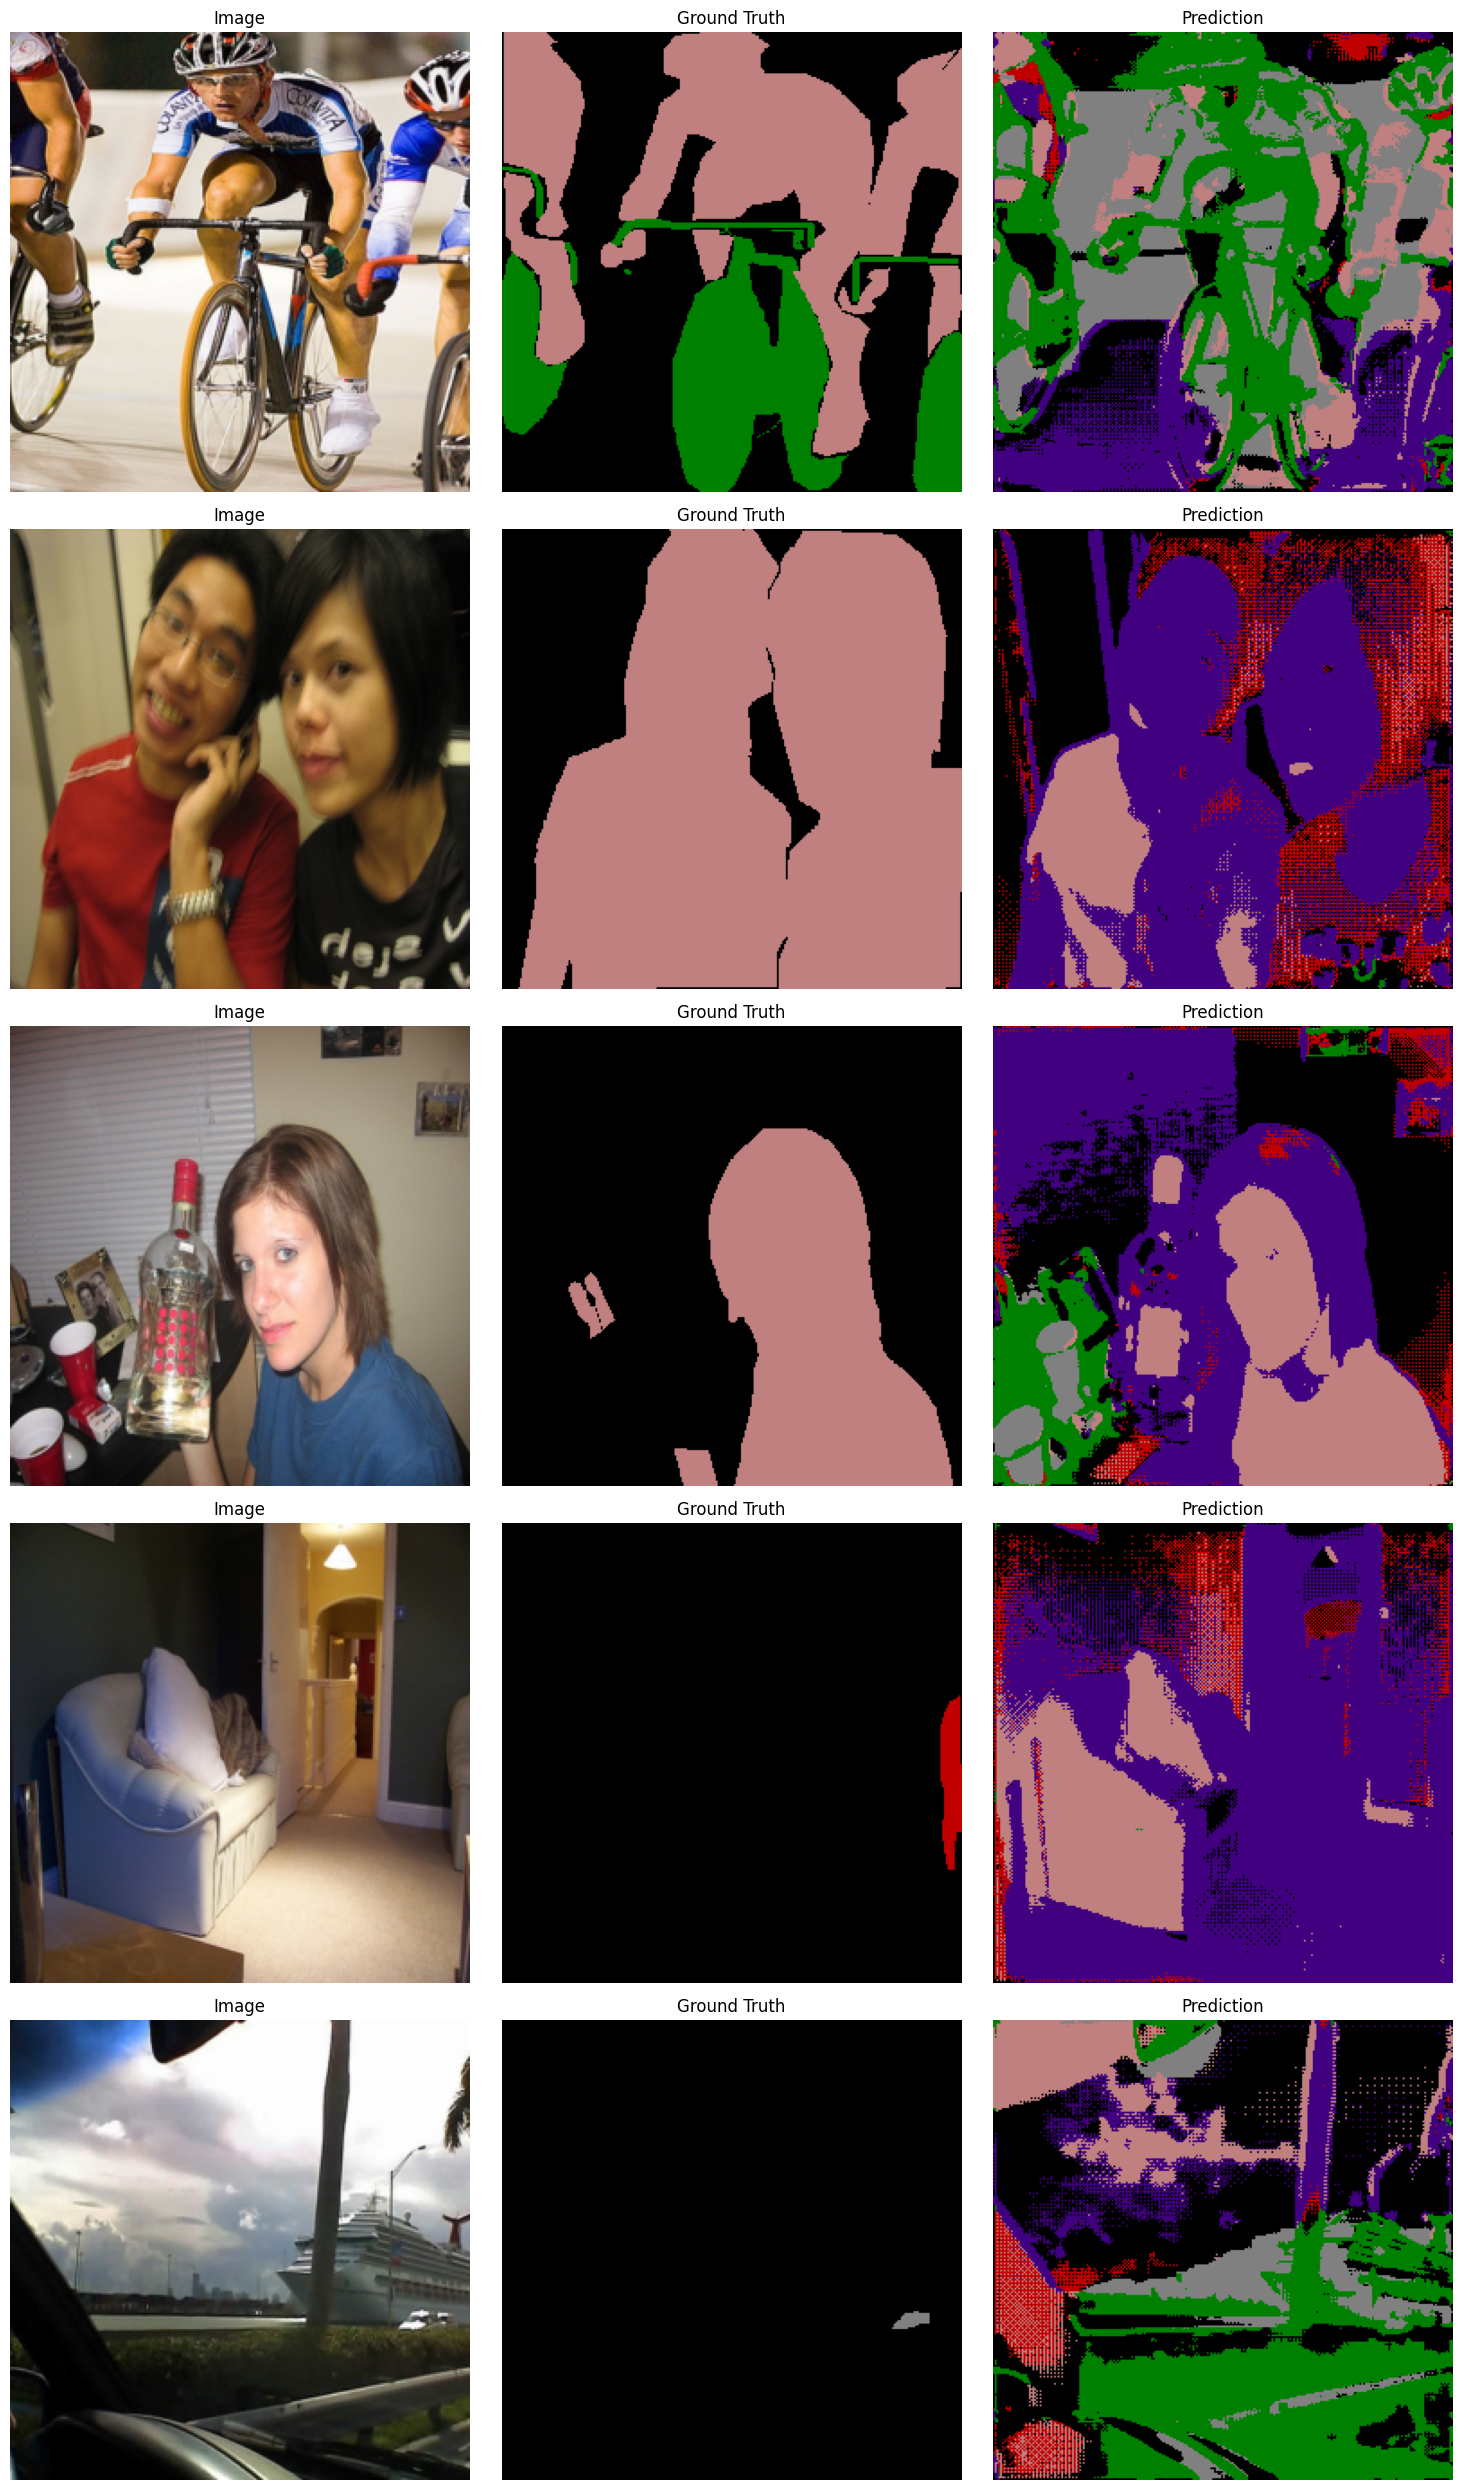

In [ ]:
# Trực quan hóa kết quả cuối cùng
visualize_predictions(resunet, val_dataset, num_samples=5)

## Q3 Hiểu sâu hơn về nhiệm vụ phân đoạn ngữ nghĩa

Trong câu hỏi này, bạn sẽ khám phá cách sử dụng transfer learning để cải thiện hiệu suất phân đoạn ngữ nghĩa. Cụ thể, bạn sẽ sử dụng backbone đã huấn luyện trước (ví dụ ResNet) làm phần encoder của kiến trúc U-Net.

Transfer Learning cho Phân Đoạn Ngữ Nghĩa

1. Triển khai U-Net với backbone ResNet đã huấn luyện trước
2. Fine-tune mô hình trên bộ dữ liệu Pascal VOC
3. So sánh hiệu suất với các mô hình trước đó

### Task 1: Phân tích phân phối lớp để xác định long-tailed distribution (5 điểm)
Trong nhiệm vụ này, bạn cần phân tích phân phối lớp để xác định long-tailed distribution. Bạn có thể tự do chọn phương pháp để trực quan hóa phân phối lớp.

Analyzing class distribution: 100%|██████████| 726/726 [00:05<00:00, 124.26it/s]


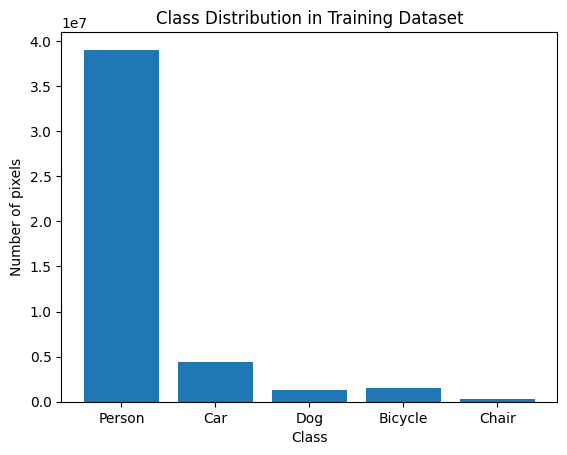

In [ ]:
num_classes = len(SELECTED_VOC_CLASSES)
class_counts = torch.zeros(num_classes)
for _, target in tqdm(train_dataset, desc="Phân tích phân phối lớp"):
    for c in range(num_classes):
        class_counts[c] += (target == c).sum().item()

plt.bar(range(num_classes), class_counts.numpy())
plt.xticks(range(num_classes), SELECTED_CLASSES)
plt.xlabel("Lớp")
plt.ylabel("Số lượng pixels")
plt.title("Phân Phối Lớp trong Dataset Huấn Luyện");

### Task 2: Điều chỉnh siêu tham số (10 điểm)
Trong nhiệm vụ này, bạn cần điều chỉnh các siêu tham số cho các mô hình trước đó. Bạn có thể muốn phân tích hiệu suất của mô hình với các siêu tham số khác nhau, ví dụ:
* learning rates
* batch sizes
* optimizers
* loss functions
* data augmentations

In [47]:
train_model(resunet, train_loader_augmented, criterion_unet, optimizer_resunet, num_epochs=5)

 55%|█████▍    | 50/91 [00:30<00:24,  1.65it/s]

Epoch: 1, Batch: 50, Loss: 1.6240


 55%|█████▍    | 50/91 [00:29<00:24,  1.65it/s]

Epoch: 2, Batch: 50, Loss: 1.6297


 55%|█████▍    | 50/91 [00:30<00:24,  1.68it/s]

Epoch: 3, Batch: 50, Loss: 1.5808


 55%|█████▍    | 50/91 [00:31<00:26,  1.57it/s]

Epoch: 4, Batch: 50, Loss: 1.6001


 55%|█████▍    | 50/91 [00:31<00:25,  1.61it/s]

Epoch: 5, Batch: 50, Loss: 1.5100


100%|██████████| 91/91 [00:56<00:00,  1.60it/s]


In [48]:
validate_model(resunet, val_loader, criterion_unet)

100%|██████████| 90/90 [00:22<00:00,  4.02it/s]

Validation - Loss: 1.4922, Mean IoU: 0.0772


(1.4921851833661397, 0.0771912079407937)

### Task 3: Triển khai U-Net với các mô hình đã huấn luyện trước khác và fine-tune (15 điểm)
Trong nhiệm vụ này, bạn cần triển khai U-Net với backbone ResNet đã huấn luyện trước khác. Bạn sẽ khám phá cách sử dụng transfer learning để cải thiện hiệu suất phân đoạn ngữ nghĩa.

In [49]:
class ResUNetWithResNetBackbone(nn.Module):
    def __init__(self, n_classes=6):
        super(ResUNetWithResNetBackbone, self).__init__()

        # Load pre-trained ResNet34 as encoder
        self.resnet = resnet34(weights=ResNet34_Weights.DEFAULT)

        # Encoder layers
        self.encoder1 = nn.Sequential(
            self.resnet.conv1,
            self.resnet.bn1,
            self.resnet.relu
        )  # 64 channels
        self.pool1 = self.resnet.maxpool
        self.encoder2 = self.resnet.layer1  # 64 channels
        self.encoder3 = self.resnet.layer2  # 128 channels
        self.encoder4 = self.resnet.layer3  # 256 channels
        self.encoder5 = self.resnet.layer4  # 512 channels

        # Decoder layers
        self.up1 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.conv1 = ResidualBlock(512, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv2 = ResidualBlock(256, 128)

        self.up3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.conv3 = ResidualBlock(128, 64)

        self.up4 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.conv4 = ResidualBlock(96, 32)

        self.up5 = nn.ConvTranspose2d(32, 32, kernel_size=2, stride=2)
        self.outc = nn.Conv2d(32, n_classes, kernel_size=1)

    def forward(self, x):
        # Encoder
        e1 = self.encoder1(x)
        e2 = self.encoder2(self.pool1(e1))
        e3 = self.encoder3(e2)
        e4 = self.encoder4(e3)
        e5 = self.encoder5(e4)

        # Decoder with skip connections
        x = self.up1(e5)
        x = torch.cat([x, e4], dim=1)
        x = self.conv1(x)

        x = self.up2(x)
        x = torch.cat([x, e3], dim=1)
        x = self.conv2(x)

        x = self.up3(x)
        x = torch.cat([x, e2], dim=1)
        x = self.conv3(x)

        x = self.up4(x)
        x = torch.cat([x, e1], dim=1)
        x = self.conv4(x)

        x = self.up5(x)
        x = self.outc(x)
        return x

In [50]:
resunet_resnet = ResUNetWithResNetBackbone(n_classes=6).to(device)
resunet_resnet.resnet.requires_grad_(False)

optimizer_transfer_resu = optim.AdamW(resunet_resnet.parameters(), lr=1e-3, weight_decay=1e-4)

In [51]:
train_model(resunet_resnet, train_loader_augmented, focal_loss, optimizer_transfer_resu, num_epochs=5)

 56%|█████▌    | 51/91 [00:07<00:05,  7.66it/s]

Epoch: 1, Batch: 50, Loss: 0.0698


 56%|█████▌    | 51/91 [00:07<00:04,  8.09it/s]

Epoch: 2, Batch: 50, Loss: 0.0373


 56%|█████▌    | 51/91 [00:07<00:05,  7.77it/s]

Epoch: 3, Batch: 50, Loss: 0.0322


 56%|█████▌    | 51/91 [00:07<00:04,  8.22it/s]

Epoch: 4, Batch: 50, Loss: 0.0403


 56%|█████▌    | 51/91 [00:07<00:05,  7.89it/s]

Epoch: 5, Batch: 50, Loss: 0.0325


100%|██████████| 91/91 [00:12<00:00,  7.41it/s]


In [52]:
validate_model(resunet_resnet, val_loader, focal_loss)

100%|██████████| 90/90 [00:08<00:00, 10.18it/s]

Validation - Loss: 0.0281, Mean IoU: 0.0294


(0.028095765504986048, 0.029432526516676362)

### Task 4: So sánh các kiến trúc khác nhau (10 điểm)
U-Net là kiến trúc truyền thống dựa trên CNN. Có những kiến trúc khác có thể phù hợp hơn cho các nhiệm vụ phân đoạn ngữ nghĩa, như các kiến trúc dựa trên transformer. Bạn có thể chọn một hoặc nhiều kiến trúc có thể và so sánh hiệu suất của chúng với các mô hình trước đó.

In [53]:
class TransformerBlock(nn.Module):
    def __init__(self, dim, num_heads=4, num_layers=2):
        super(TransformerBlock, self).__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim, nhead=num_heads, dim_feedforward=dim * 4, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.pos_embed = nn.Parameter(torch.randn(1, 1024, dim))

    def forward(self, x):
        B, C, H, W = x.shape
        x = x.view(B, C, -1).permute(0, 2, 1)  # [B, HW, C]
        x = x + self.pos_embed[:, :x.shape[1], :]
        x = self.transformer(x)  # [B, HW, C]
        x = x.permute(0, 2, 1).view(B, C, H, W)
        return x


class TransformerUNet(ResUNetWithResNetBackbone):
    def __init__(self, n_classes=6):
        super(TransformerUNet, self).__init__(n_classes)
        self.transformer = TransformerBlock(dim=512, num_heads=8, num_layers=4)

    def forward(self, x):
        # Encoder, same as above
        e1 = self.encoder1(x)
        e2 = self.encoder2(self.pool1(e1))
        e3 = self.encoder3(e2)
        e4 = self.encoder4(e3)
        e5 = self.encoder5(e4)

        b = self.transformer(e5)  # 512 channels, 1/16 resolution

        # Decoder, same as above
        x = self.up1(b)
        x = torch.cat([x, e4], dim=1)
        x = self.conv1(x)

        x = self.up2(x)
        x = torch.cat([x, e3], dim=1)
        x = self.conv2(x)

        x = self.up3(x)
        x = torch.cat([x, e2], dim=1)
        x = self.conv3(x)

        x = self.up4(x)
        x = torch.cat([x, e1], dim=1)
        x = self.conv4(x)

        x = self.up5(x)
        x = self.outc(x)
        return x

In [54]:
transformer_unet = TransformerUNet(n_classes=6).to(device)
transformer_unet.resnet.requires_grad_(False)

optimizer_transfer_trans = optim.AdamW(transformer_unet.parameters(), lr=1e-3, weight_decay=1e-4)

In [55]:
train_model(transformer_unet, train_loader_augmented, focal_loss, optimizer_transfer_trans, num_epochs=10)

 56%|█████▌    | 51/91 [00:08<00:05,  6.74it/s]

Epoch: 1, Batch: 50, Loss: 0.0758


 56%|█████▌    | 51/91 [00:08<00:05,  6.70it/s]

Epoch: 2, Batch: 50, Loss: 0.0496


 56%|█████▌    | 51/91 [00:07<00:06,  5.85it/s]

Epoch: 3, Batch: 50, Loss: 0.0551


 56%|█████▌    | 51/91 [00:07<00:06,  6.13it/s]

Epoch: 4, Batch: 50, Loss: 0.0392


 56%|█████▌    | 51/91 [00:08<00:06,  6.60it/s]

Epoch: 5, Batch: 50, Loss: 0.0415


 56%|█████▌    | 51/91 [00:08<00:05,  6.90it/s]

Epoch: 6, Batch: 50, Loss: 0.0360


 56%|█████▌    | 51/91 [00:08<00:05,  6.78it/s]

Epoch: 7, Batch: 50, Loss: 0.0341


 56%|█████▌    | 51/91 [00:07<00:05,  6.78it/s]

Epoch: 8, Batch: 50, Loss: 0.0260


 56%|█████▌    | 51/91 [00:07<00:06,  6.34it/s]

Epoch: 9, Batch: 50, Loss: 0.0315


 56%|█████▌    | 51/91 [00:08<00:07,  5.64it/s]

Epoch: 10, Batch: 50, Loss: 0.0308


100%|██████████| 91/91 [00:14<00:00,  6.30it/s]


In [56]:
validate_model(transformer_unet, val_loader, focal_loss)

100%|██████████| 90/90 [00:09<00:00,  9.19it/s]

Validation - Loss: 0.0221, Mean IoU: 0.0875


(0.02211830492855774, 0.08751757804097401)

## **QUAN TRỌNG**: Nhớ tải xuống cả Notebook và file csv đầu ra và nộp bằng CV Submission Link.

Đảm bảo cả hai file được đặt tên đúng.

Ví dụ:
- `JohnSmith-IOAI2025-Task2-ComputerVision.ipynb`.